# **메인교재 PART 7 - 머신러닝 데이터 분석**
# 회귀분석

## 단순회귀분석

In [1]:
# 예제 7-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())   
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

In [2]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [3]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

In [4]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())   
print('\n')

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0




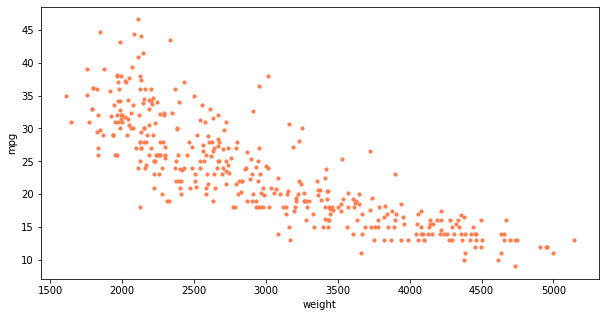

In [5]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

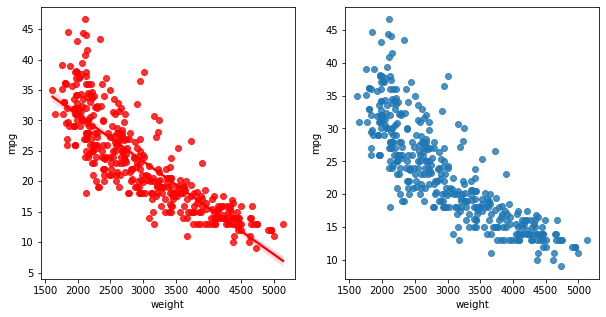

In [6]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1, color="red")                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

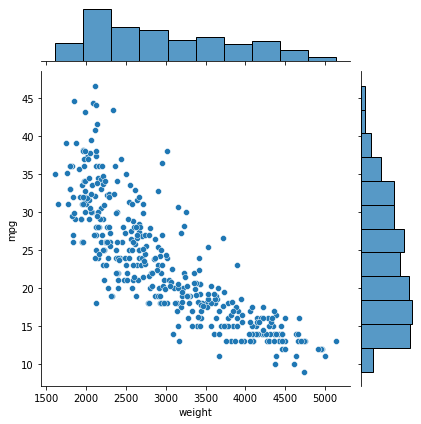

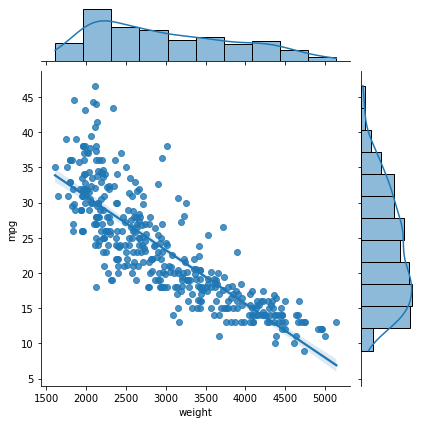

In [7]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

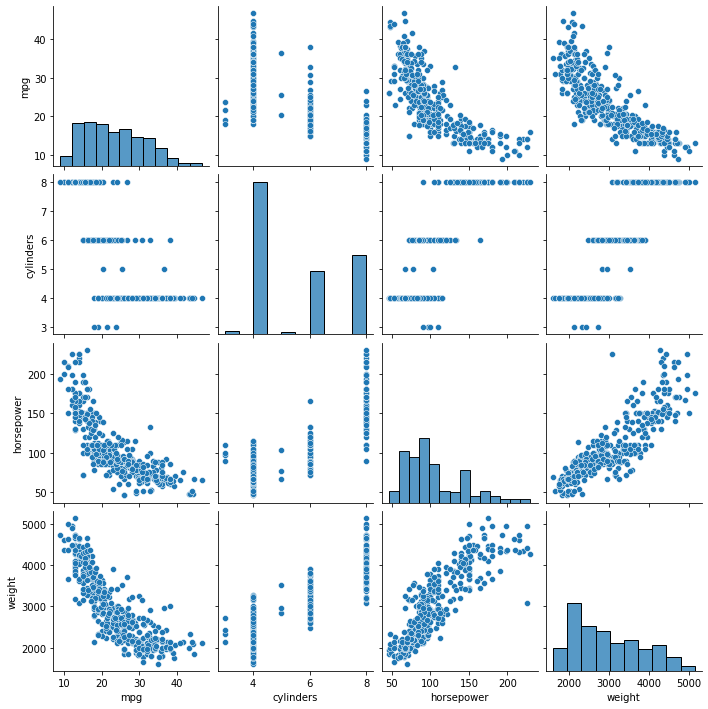

In [8]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

In [9]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


<img src="images/datasplit1.png" width="500">

In [10]:
'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

0.6822458558299325




## lr.score()의 리턴값 : <span style="color:red">결정계수</span>
### 결정계수는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도 임
### 결정계수의 값은 0에서 1사이에 있으며, 종속변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워짐 
### 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 판단함

In [11]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')


기울기 a:  [-0.00775343]


y절편 b 46.7103662572801




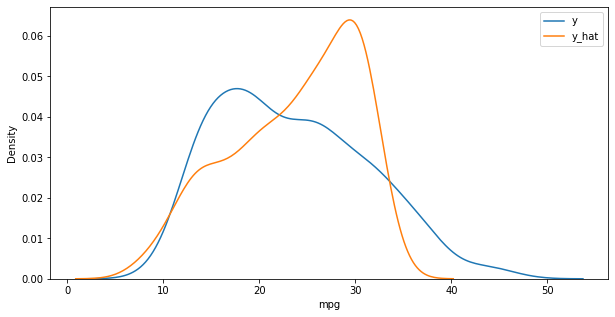

In [12]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

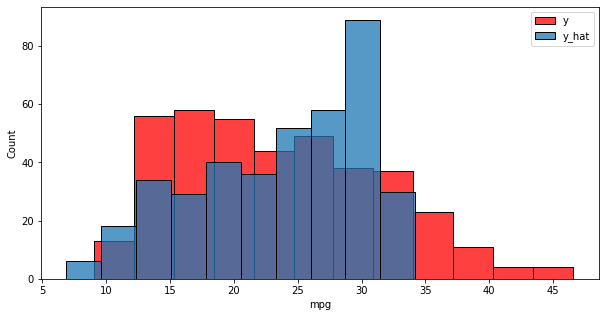

In [13]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)
plt.figure(figsize=(10, 5))
ax1 = sns.histplot(y, label="y", color="red")
ax2 = sns.histplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

## 다항회귀분석

In [14]:
### 예제 7-2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)




In [15]:
'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)




In [16]:
X_train

,weight
38,4209.0
172,2223.0
277,3410.0
196,2164.0
357,2615.0
...,...
375,1980.0
322,2110.0
15,2833.0
127,2901.0


In [17]:
display(X_train_poly[:10])

array([[1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.2230000e+03, 4.9417290e+06],
       [1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 2.7950000e+03, 7.8120250e+06],
       [1.0000000e+00, 3.2450000e+03, 1.0530025e+07],
       [1.0000000e+00, 3.1020000e+03, 9.6224040e+06],
       [1.0000000e+00, 2.5060000e+03, 6.2800360e+06]])

In [18]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

0.708700926297548




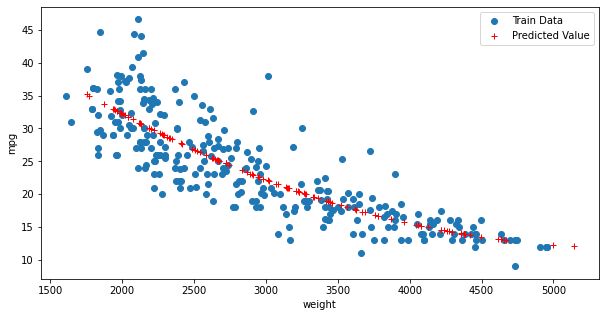

In [19]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

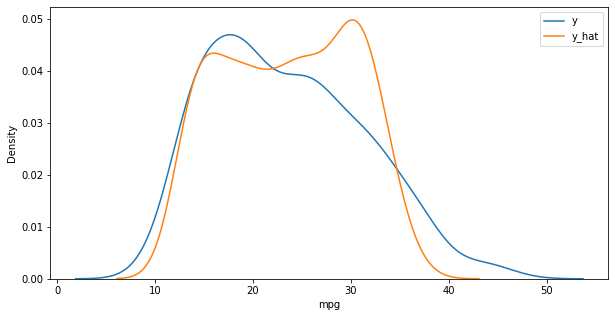

In [20]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

## 다중회귀분석

In [21]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 3] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]


'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n') 

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)




In [22]:
'''
Step 5: 다중회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('상수항 b', lr.intercept_)
print('\n')

0.6939048496695599


X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.414351269634025




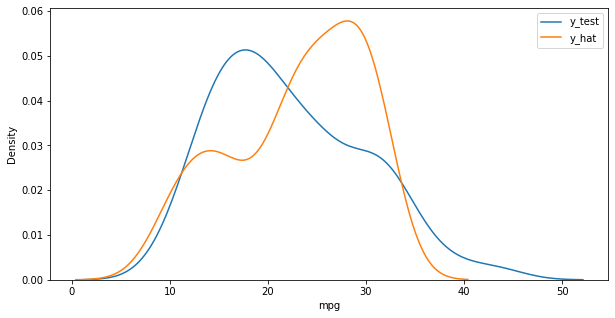

In [23]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

---
# 분류 분석

## KNN - K Nearest Neighbors

### K-최근접 이웃 (K-Nearest Neighbor) 알고리즘은 지도학습 알고리즘 중 하나
### 새로운 데이터를 입력 받았을 때, 해당 데이터와 가장 가까이에 있는 k개의 데이터를 확인해, 새로운 데이터의 특성을 파악하는 방법
### 주변에 가장 가까이 있는게 무엇인가?"가 아닌 "주변에 가장 가깝고, 많이 있는 것이 무엇인가?"라는 방식을 사용
### "k-최근접 이웃 알고리즘"이라고 부르며, k는 가장 가까이에 있는 데이터의 개수를 의미

<img src="images/knn1.png" width="300">

### K가 1일때는 "?" 를 파란 동그라미라고 판단하겠지만 K를 4로 변경한다면 빨간 세모라고 판단

### K 선택하기
#### K는 몇으로 설정하는게 좋을까?

#### 최선의 K값을 선택하는 것은 데이터마다 다르게 접근해야 함

#### **k가 낮다 → 적은 이웃 수로 판단한다 → 불안정한 결과 ~ 오버피팅**
#### **k가 높다 → 많은 이웃 수로 판단한다 → 지나친 일반화 ~ 언더피팅**
#### k를 선택하는 방법 : 가장 좋은 성능을 내는 값으로 선택
---

![fitting1](images/fit.jpg)

In [24]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df.head())   
print('\n')

   survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
0         0       3    male  22.0      1  ...        True   NaN  Southampton   
1         1       1  female  38.0      1  ...       False     C    Cherbourg   
2         1       3  female  26.0      0  ...       False   NaN  Southampton   
3         1       1  female  35.0      1  ...       False     C  Southampton   
4         0       3    male  35.0      0  ...        True   NaN  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

[5 rows x 15 columns]


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0 

In [25]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
print(rdf.columns.values)
print('\n')

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))
print('\n')

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'clas

In [26]:
'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())   
print('\n')

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())   
print('\n')

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1




In [27]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


In [28]:
'''
[Step 5] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)
aa = knn.predict_proba(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]
[[110  15]
 [ 26  64]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       125
           1       0.81      0.71      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



---
## 머신러닝 분류 모델의 성능 평가 지표 Accuracy, Recall, Precision, F1

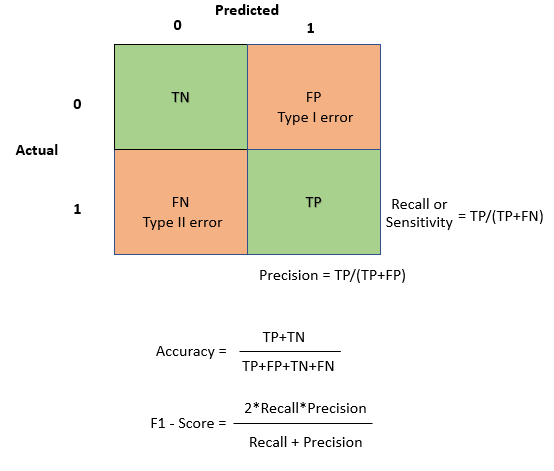

#### True Positive(TP) : Positive인 정답을 Positive라고 예측 (True) 
#### True Negative(TN) : Negative인 정답을 Negative라고 예측 (True)
#### False Positive(FP) : Negative인 정답을 Positive라고 예측 (False) 
#### False Negative(FN) : Positive인 정답을 Negative라고 예측 (False) 

### 분류 모델의 성능을 평가할 수 있는 5개 지표
- Accuracy(정확도)
- Precision(정밀도)
- Recall(재현율)
- F1 Score
- ROC(AUC) 학습 곡선

- **Accuracy** : 전체 예측 건수에서 정답을 맞힌 건수의 비율(TP+TN/TP+TN+FP+FN)
- **Precision** : 예측값이 참인데 맞춘 비율(TP/TP+NP)
- **Recall** : 실제값이 참이데 맞춘 비율(TP/TP+FN)
- **F1 Score** : precision과 recall은 서로 반대 개념의 지표, precision과 recall의 조화평균
               (두 지표를 모두 균형있게 반영하여 모델의 성능 측정)
               0~1 사이의 값으로 precision과 recall이 어느 한 쪽으로 치우치지 않을 때 높은 값을 가짐
- **ROC** : ROC 학습 곡선은 y축에 TP, x축에 FP 수치를 배치해서 두 수치의 균형을 살펴보는 머신러닝 평가를 위한 시각화 모델
          ROC 커브 아랫 면적인 AUC 가 1에 가까울수록 Y를 예측하는 정확도가 높은 모델이다.

In [38]:
cm = metrics.confusion_matrix(y_test, y_hat) 
cm

array([[110,  15],
       [ 26,  64]], dtype=int64)

In [30]:
metrics.accuracy_score(y_test, y_hat) 

0.8093023255813954

In [31]:
metrics.precision_score(y_test, y_hat) 

0.810126582278481

In [32]:
metrics.recall_score(y_test, y_hat) 

0.7111111111111111

In [33]:
metrics.f1_score(y_test, y_hat) 

0.757396449704142

In [34]:
knn.score(X_test, y_test) 

0.8093023255813954

C:\Users\UNICO\anaconda3\envs\pydatavenvnew\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


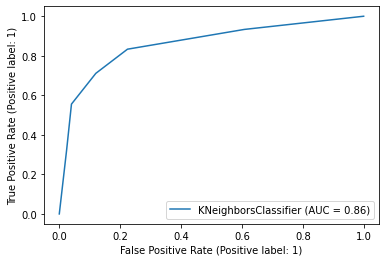

In [41]:
import matplotlib.pyplot as plt

metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

---
## 사이킷런의 빌트인 데이터셋 - sklearn.utils.Bunch 객체

### 튜토리얼 진행을 위한 수준이므로, 규모가 크지는 않음(Toy Dataset)

- load_boston: 보스톤 집값 데이터
- load_iris: 아이리스 붓꽃 데이터
- load_diabetes: 당뇨병 환자 데이터
- load_digits: 손글씨 데이터
- load_linnerud: multi-output regression 용 데이터
- load_wine: 와인 데이터
- load_breast_cancer: 위스콘신 유방암 환자 데이터

### sklearn.utils.Bunch 라는 자료구조는 key-value 형식으로 구성되어 있으며, 사전(dict)형 타입과 유사한 구조를 가지고 있음

- data: 샘플 데이터, Numpy 배열로 이루어져 있습니다.
- target: Label 데이터, Numpy 배열로 이루어져 있습니다.
- feature_names: Feature 데이터의 이름
- target_names: Label 데이터의 이름
- DESCR: 데이터 셋의 설명
- filename: 데이터 셋의 파일 저장 위치 (csv)

### 아이리스 붓꽃 데이터
- data : 각 IRIS의 feature들에 대한 실제 값들이 존재 한다. 
- target : target name의 index들이 존재한다. 이번경우 target_name이 총 3종류 이므로 0,1,2로 구성되어있다. 
- target_names : IRIS 품종에대한 이름이 존재한다. 
- DESCR : 해당 dataset에 대한 간단한 설명이 들어있는 부분이다. 
- feature_names : IRIS의 data 특성이 저장되어있다. 이번 경우 꽃받침의 길이, 너비 꽃잎의 길이, 너비를 특성으로 가진다. 
<img src="images/sklearn3.png" width="800">

In [42]:
# 추가 예제
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
print(type(iris_dataset))
print(iris_dataset.keys())
print(iris_dataset['data'][:10])
target = iris_dataset['target']    # label
print(target[[0,1,2,50,51,52,100,101,102]])
print(iris_dataset['target_names'])
print(iris_dataset['feature_names'])
print(iris_dataset['DESCR'])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 1 1 1 2 2 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ==

In [43]:
# train/test 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'],
                                                                    target,
                                                                    test_size = 0.3,   # test data의 비율
                                                                    random_state=0)    # random seed 값

# 지도학습 모델 중 k-nn모델
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_input, train_label)    # 분류기 모델에 학습 데이터와 label 데이터 적용
predict_label = knn.predict(test_input)    # 분류기 모델의 결과 예측
print(predict_label)
print(test_label)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0]


In [44]:
import numpy as np
print('test accuracy {:.2f}'.format(np.mean(test_label == predict_label)))   

test accuracy 0.98


In [45]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(test_input, test_label)))

테스트 세트의 정확도: 0.98


In [46]:
metrics.confusion_matrix(y_test, y_hat) 

array([[110,  15],
       [ 26,  64]], dtype=int64)

In [47]:
import numpy as np
X_new = np.array([[5.1, 3.5, 1.4, 0.2]])
 
prediction = knn.predict(X_new)
 
print("예측한 타깃의 이름 : {}".format(iris_dataset['target_names'][prediction]))

예측한 타깃의 이름 : ['setosa']


---
## SVM - Support Vector Machine

### 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다. 
### 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.

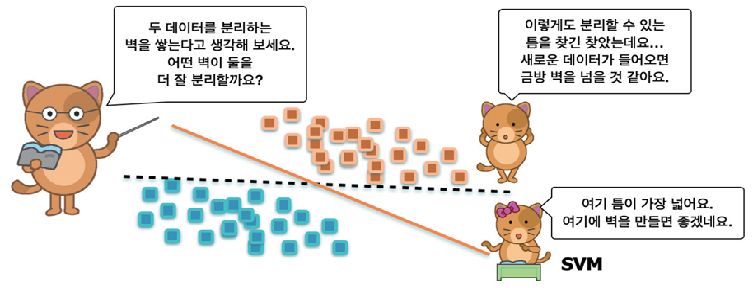

### 최적의 결정 경계(Decision Boundary)
![SVM!](images/svm1.png)
### 결정 경계는 데이터 군으로부터 최대한 멀리 떨어지는 게 좋다.
### Support Vectors는 결정 경계와 가까이 있는 데이터 포인트들을 의미한다.
### 마진(Margin)은 결정 경계와 서포트 벡터 사이의 거리를 의미한다.
![SVM!](images/svm2.png)
### 점선으로부터 결정 경계까지의 거리가 바로 ‘마진(margin)’이다.
### 최적의 결정 경계는 마진을 최대화하는 것이다.

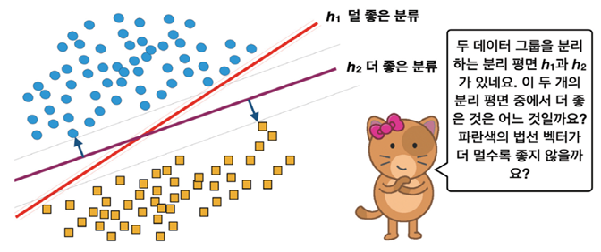

### 매개변수 C : 오류를 어느정도 허용할 것인지를 설정(0~1(기본값은 1)), C 값이 클수록 허용 안함.

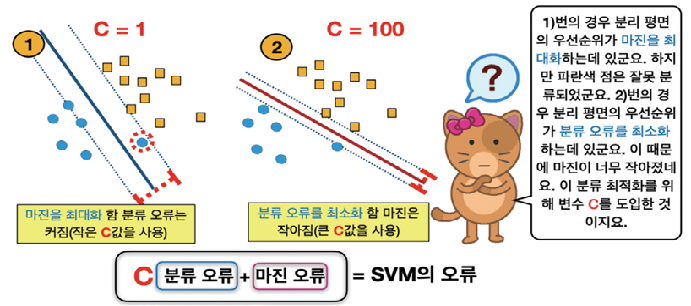

### 매개변수 kernel : 기본값은 'rdf', 데이터의 선형 관계 여부에 따라 'linear' 또는 'poly' 설정 가능
### rbf : Radial Bias Function의 약어로 보통 RBF 커널 혹은 가우시안 커널이라고 부른다.

In [48]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

In [49]:
'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

In [50]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (499, 9)
test data 개수:  (215, 9)




In [51]:
'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]




In [52]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



---
## Decision Tree
### 의사결정 나무(Decision Tree)는 각 데이터들이 가진 속성들로부터 패턴을 찾아내서 분류 과제를 수행할 수 있도록 하는 지도학습 머신러닝 모델

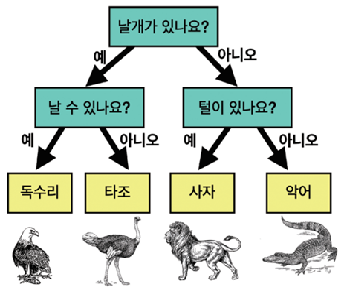

- 분할과 가지치기 과정을 반복하면서 모델을 생성한다.
- 여러개의 모델을 함께 사용하는 앙상블 모델이 존재한다. (RandomForest, GradientBoosting, XGBoost)
- 각 특성이 개별 처리되기 때문에 데이터 스케일에 영향을 받지 않아 특성의 정규화나 표준화가 필요 없다.
- 시계열 데이터와 같이 범위 밖의 포인트는 예측 할 수 없다.

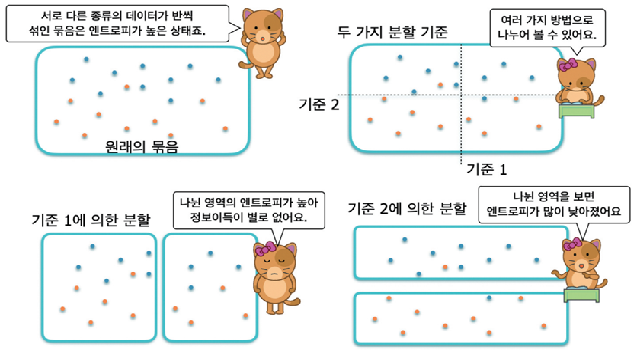


In [53]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

In [54]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
print(df['bare_nuclei'].unique())                         # bare_nuclei 열의 고유값 확인
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')       # 문자열을 정수형으로 변환

print(df.describe())                                      # 데이터 통계 요약정보 확인
print('\n')

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   cl

In [55]:
'''
[Step 3] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''
feature_names = ['clump','cell_size','cell_shape', 'adhesion','epithlial',
      'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']
# 속성(변수) 선택
X=df[feature_names]  #설명 변수 X
y=df['class']                                                   #예측 변수 Y

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (478, 9)
test data 개수:  (205, 9)




In [56]:
'''
[Step 4] Decision Tree 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

# 모형 객체 생성 (criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = tree_model.predict(X_test)      # 2: benign(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]




In [57]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
tree_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)            
print(tree_report)

[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



[Text(0.5921052631578947, 0.9166666666666666, 'cell_size <= 0.114\nentropy = 0.93\nsamples = 478\nvalue = [313, 165]\nclass = c'),
 Text(0.2894736842105263, 0.75, 'bare_nuclei <= -0.287\nentropy = 0.416\nsamples = 333\nvalue = [305, 28]\nclass = c'),
 Text(0.10526315789473684, 0.5833333333333334, 'normal_nucleoli <= 0.207\nentropy = 0.06\nsamples = 289\nvalue = [287, 2]\nclass = c'),
 Text(0.05263157894736842, 0.4166666666666667, 'entropy = 0.0\nsamples = 284\nvalue = [284, 0]\nclass = c'),
 Text(0.15789473684210525, 0.4166666666666667, 'clump <= 0.198\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]\nclass = c'),
 Text(0.10526315789473684, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = c'),
 Text(0.21052631578947367, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = l'),
 Text(0.47368421052631576, 0.5833333333333334, 'clump <= -0.334\nentropy = 0.976\nsamples = 44\nvalue = [18, 26]\nclass = l'),
 Text(0.3684210526315789, 0.4166666666666667, 'cell_shape <= 0.095\nentr

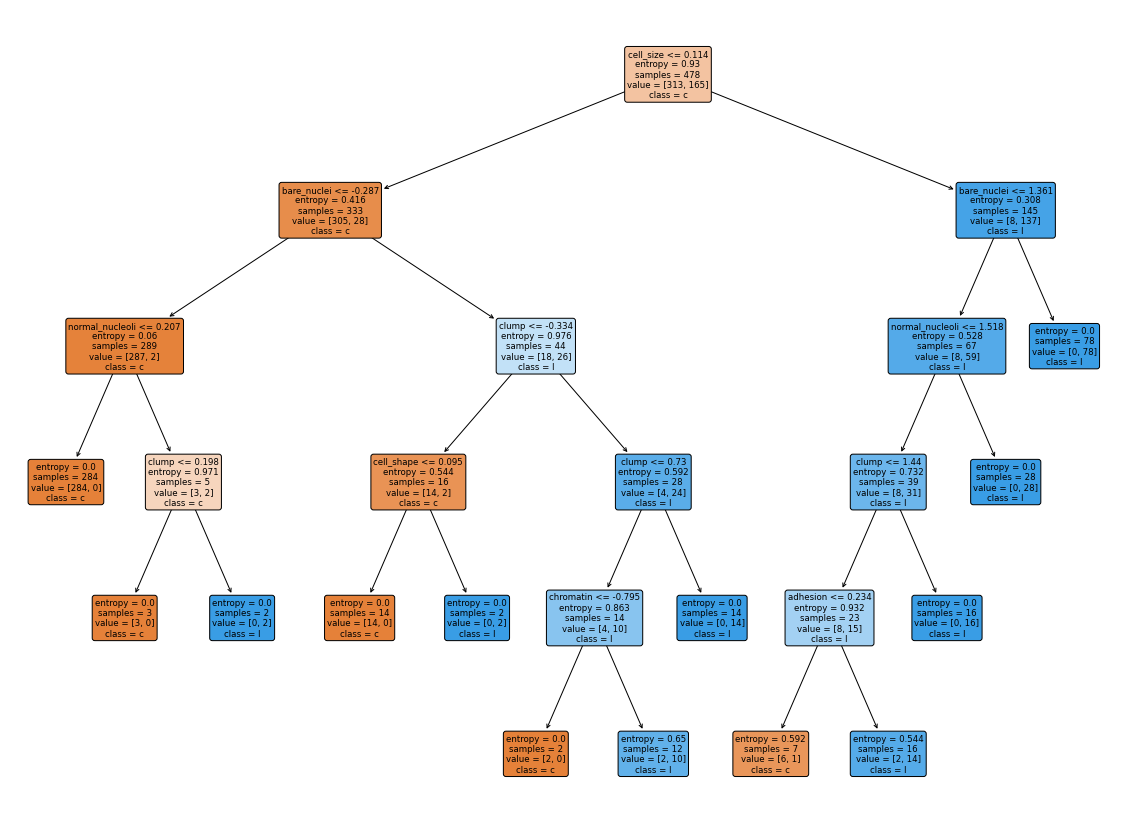

In [58]:
plt.figure( figsize=(20,15) )

tree.plot_tree(tree_model, 
               class_names="class",
               feature_names=feature_names,
               impurity=True, filled=True,
               rounded=True)

In [59]:
# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                                    iris_dataset['target'],
                                                                    test_size = 0.3,   # test data의 비율
                                                                    random_state=0)    # random seed 값
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
# 지도학습 모델 중 DecisionTree 모델
# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

# 모형 객체 생성 (criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier()#criterion='entropy')

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = tree_model.predict(X_test)      # 2: benign(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test[0:10])
print('\n')

import numpy as np
print('test accuracy {:.2f}'.format(np.mean(y_test == y_hat)))   

train data 개수:  (105, 4)
test data 개수:  (45, 4)
[2 1 0 2 0 2 0 1 1 1]
[2 1 0 2 0 2 0 1 1 1]


test accuracy 0.98


In [60]:
len(iris_dataset['data'])

150

In [61]:
print("테스트 세트의 정확도: {:.2f}".format(tree_model.score(X_test, y_test)))

테스트 세트의 정확도: 0.98


In [62]:
for name, value in zip(iris_dataset['feature_names'] , tree_model.feature_importances_):
    print('{} : {:.3f}'.format(name, value))

sepal length (cm) : 0.000
sepal width (cm) : 0.043
petal length (cm) : 0.404
petal width (cm) : 0.553


In [63]:
tree_model.feature_importances_

array([0.        , 0.04300928, 0.40406279, 0.55292793])

[Text(0.4, 0.9, 'petal_width <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'petal_length <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = virginica'),
 Text(0.2, 0.5, 'petal_width <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal_width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'petal_length <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica'),
 Text(0.7, 0.3, 'sepal_width <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.6, 0.1, 'gini = 0

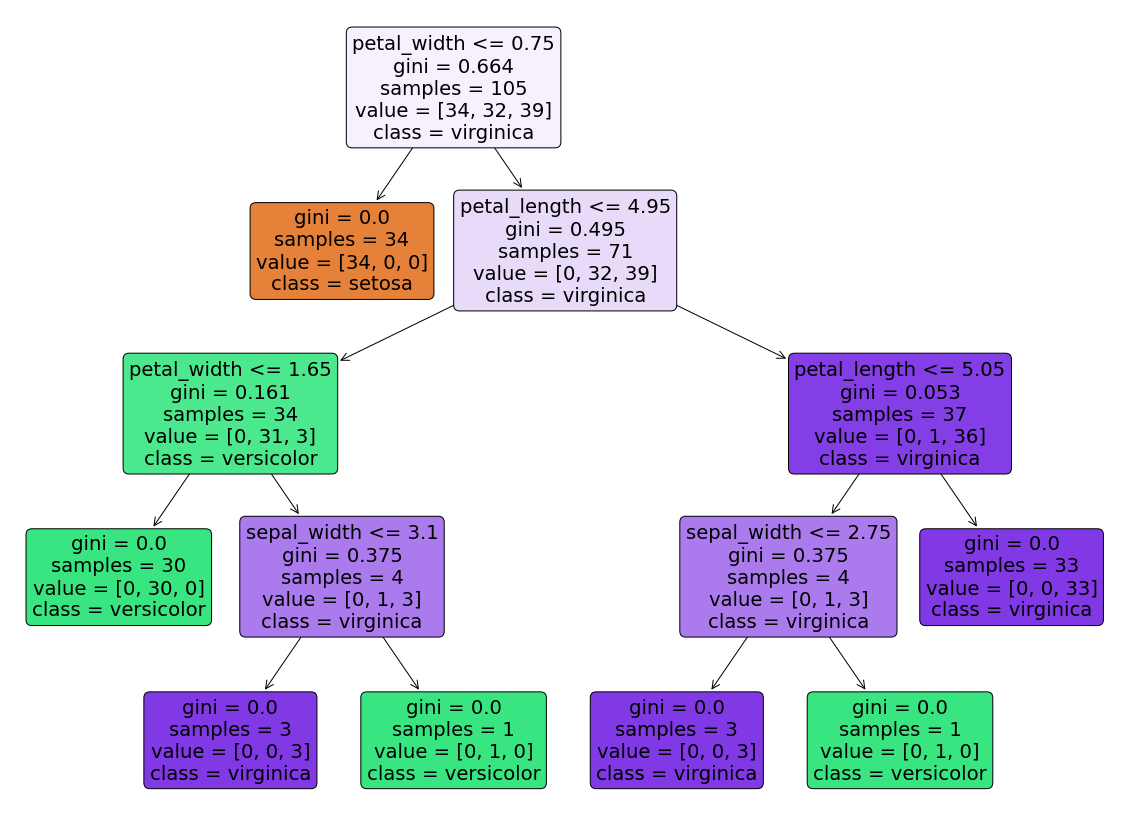

In [64]:
import matplotlib.pyplot as plt
plt.figure( figsize=(20,15) )
explt_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
class_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}
tree.plot_tree(tree_model, 
               class_names=class_val,
               feature_names=explt_vars,
               impurity=True, filled=True,
               rounded=True)

---
## k-Means

### 다루는 데이터에 "레이블"이 붙어 있다면 지도학습, 즉 미리 가지고 있는 데이터와 레이블을 기반으로 예측이나 분류를 수행하는 모델을 만들 수 있다. 
### 레이블이 없는 데이터 안에서 패턴과 구조를 발견하는 비지도 학습도 머신러닝의 큰 축이고, 그 중 가장 대표적인 비지도 학습 기술이 바로 Clustering(군집화)이다.
### Classification(분류)은 미리 레이블이 붙어 있는 데이터들을 학습해서 그걸 바탕으로 새로운 데이터에 대해 분류를 수행
### Clustering(군집)은 레이블을 모르더라도 그냥 비슷한 속성을 가진 데이터들끼리 묶음
### 군집화의 목표는 서로 유사한 데이터들은 같은 그룹으로, 서로 유사하지 않은 데이터는 다른 그룹으로 분리하는 것
- 몇개의 그룹으로 묶을 것인가
- 데이터의 “유사도”를 어떻게 정의할 것인가 (유사한 데이터란 무엇인가)

## K-Means 군집화의 원리
### "K"는 데이터 세트에서 찾을 것으로 예상되는 클러스터(그룹) 수를 말한다.
### "Means"는 각 데이터로부터 그 데이터가 속한 클러스터의 중심까지의 평균 거리를 의미한다. (이 값을 최소화하는 게 알고리즘의 목표가 된다.)
### K-Means에서는 이걸 구현하기 위해 반복적인(iterative) 접근을 취한다.

### 일단 K개의 임의의 중심점(centroid)을 배치하고
### 각 데이터들을 가장 가까운 중심점으로 할당한다. (일종의 군집을 형성한다.)
### 군집으로 지정된 데이터들을 기반으로 해당 군집의 중심점을 업데이트한다.
### 2번, 3번 단계를 그래서 수렴이 될 때까지, 즉 더이상 중심점이 업데이트 되지 않을 때까지 반복한다.

![kmeans1](images/kmeans1.png)

In [65]:
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

In [66]:
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]




In [67]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 4 0 0 1 1 0 0 1 1 4 0 1 1 0 4 0 0 1 4 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 0 0 1 0 4 4 1 1 1 1 1 4 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 3 1
 1 1 1 0 0 1 1 1 0 1 1 2 0 2 2 0 0 2 2 2 0 2 2 2 0 2 4 2 2 0 2 0 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 0 2 2 2 2 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 2 0
 2 0 0 2 0 0 0 0 0 0 0 2 2 0 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2
 4 2 0 2 2 2 2 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

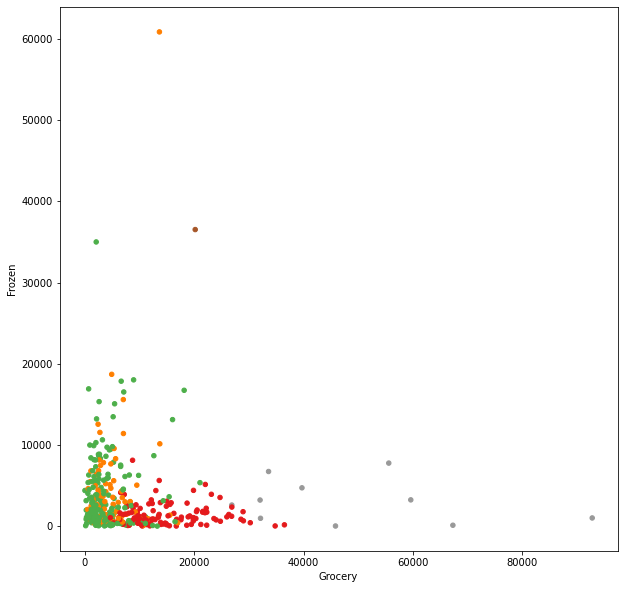

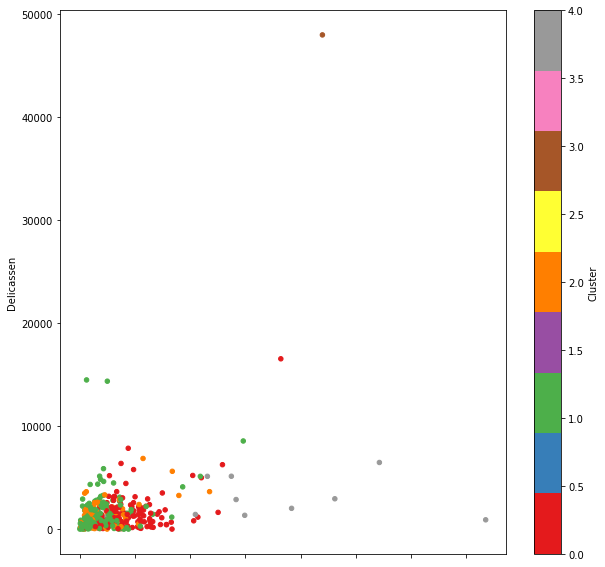

In [68]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

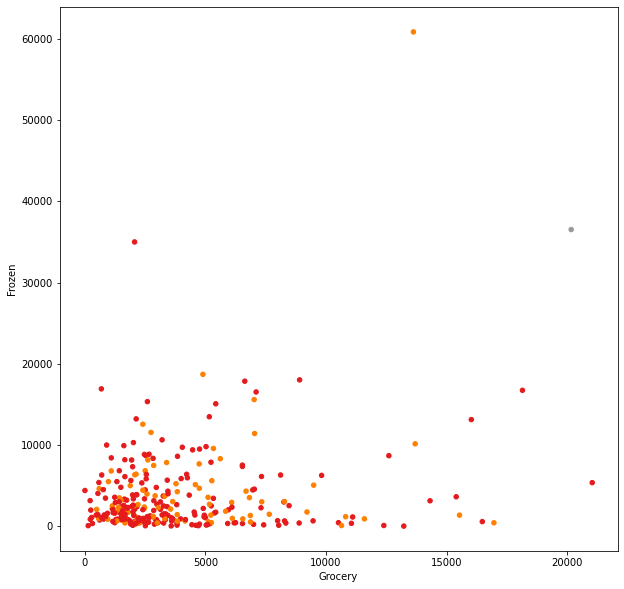

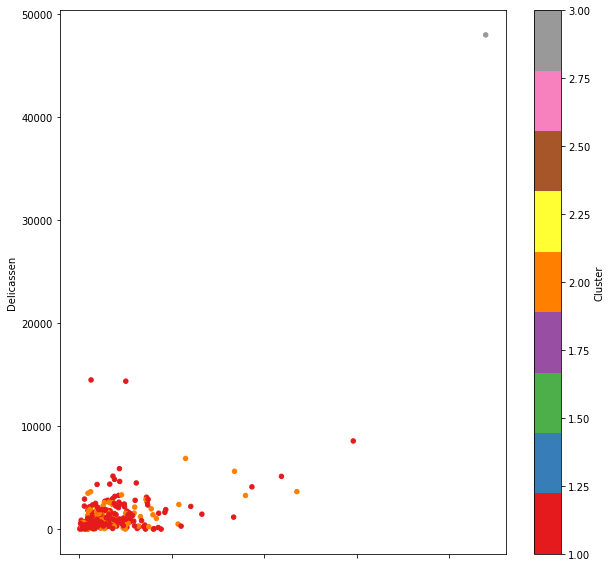

In [69]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

In [70]:
print(kmeans.cluster_centers_)

[[ 1.44865163e+00  1.69928497e-01 -3.14722179e-01  4.52466342e-01
   6.66146634e-01 -3.51066687e-01  6.83203927e-01  4.65876480e-02]
 [-6.80159888e-01  5.90668285e-01  1.49701883e-01 -3.38970651e-01
  -4.35787592e-01  8.62596306e-02 -4.39578802e-01 -7.92402039e-02]
 [-5.74049873e-01 -1.58776439e+00  3.22040971e-02 -3.24809935e-01
  -3.91593636e-01  2.08356115e-01 -4.23471344e-01 -1.15896320e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]]


## Inertia value를 이용한 적정 군집수 판단

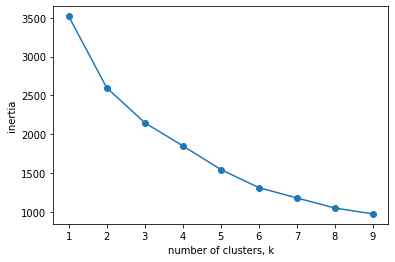

In [71]:
# 변화의 폭이 크지 않음이 처음 나타나는 부분에서 k값을 선택
ks = range(1,10)
inertias = []
for k in ks:
    model = cluster.KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [72]:
# 추가 예제
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# 데이터 불러오기
iris = datasets.load_iris()

# 종속변수 지정
X = iris.data[:, :2]
y = iris.target



Text(0, 0.5, 'Sepal Width')

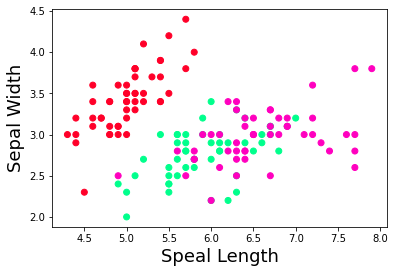

In [73]:
# Sepal length”와 “Sepal width” 컬럼 두개만 추출하여 
# 스캐터 플롯으로 확인

plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)


In [74]:
# 비지도학습 모델
kmeans = KMeans(n_clusters = 3, random_state=21)

# 모델 학습
kmeans.fit(X)


KMeans(n_clusters=3, random_state=21)

In [75]:
# 중심점 출력
centers = kmeans.cluster_centers_
print(centers)


[[5.77358491 2.69245283]
 [5.006      3.428     ]
 [6.81276596 3.07446809]]


## Inertia value를 이용한 적정 군집수 판단

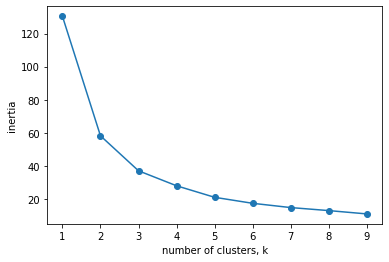

In [76]:
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Text(0.5, 1.0, 'Predicted')

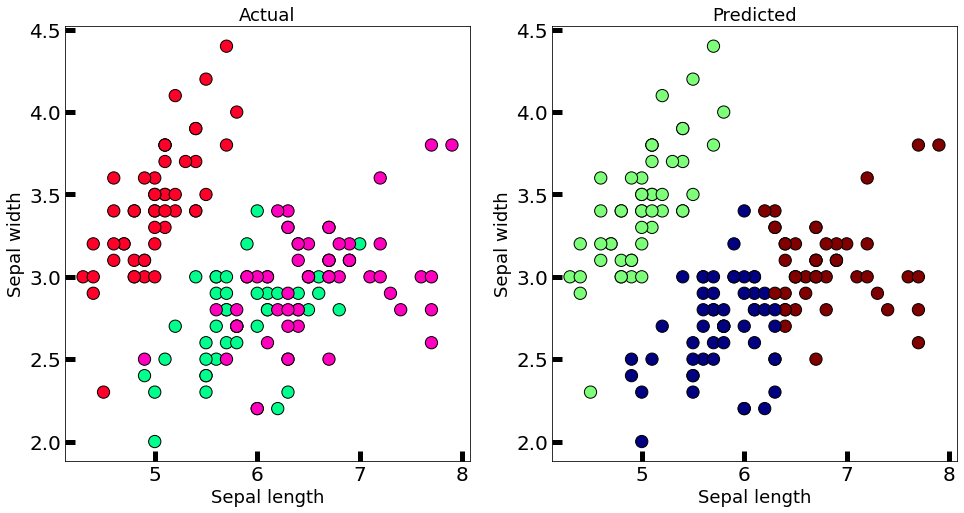

In [77]:
# 원본 데이터와 클러스링 결과 비교 
# 해당 데이터가 어느 클러스터에 속하는지 확인 합니다.

new_labels = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)


---
## DBSCAN - Density-Based Spatial Clustering of Applications with Noise

### KMeans는 군집간의 거리를 이용하여 클러스터링하는 방법이고 DBSCAN은 밀도 방식의 클러스터링하는 방법이다.
### 밀도 기반의 클러스터링은 점이 세밀하게 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식이다. 
### 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식이다.
### 점 p가 있다고 할때, 점 p에서 부터 거리 e (epsilon)내에 점이 m(minPts) 개 있으면 하나의 군집으로 인식한다.
### DBSCAN 알고리즘을 사용하려면 기준점 부터의 거리 epsilon값과, 이 반경내에 있는 점의 수 minPts를 인자로 전달해야 한다.
### 

#### minPts=4 이면, 파란점 P를 중심으로 반경 epsilon 내에 점이 4개 이상 있으면 하나의 군집으로 판단하는데, 
#### 아래 그림은 점이 5개가 있기 때문에 하나의 군집으로 판단이 되고, P는 core point가 된다.
<img src="images/dbscan1.png" width="200">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="images/dbscan2.png" width="200"><br>
<img src="images/dbscan3.png" width="200">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="images/dbscan4.png" width="200"><br>
<img src="images/dbscan5.png" width="200">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="images/dbscan6.png" width="200">

**점을 중심으로 epsilon 반경내에 minPts 이상수의 점이 있으면 그 점을 중심으로 군집이 되고 그 점을 core point라고 한다. 
Core point 가 서로 다른 core point의 군집의 일부가 되면 그 군집을 서로 연결되어 있다 하고 하나의 군집으로 연결을 한다. 
군집에는 속하지만, 스스로 core point가 안되는 점을 border point라고 하고, 주로 클러스터의 외곽을 이루는 점이 된다. 
어느 클러스터에도 속하지 않는 점은 Noise point가 된다.**
![dbscan](images/dbscan7.png)

In [78]:
### 기본 라이브러리 불러오기
import pandas as pd
import folium


'''
[Step 1] 데이터 준비/ 기본 설정
'''

# 서울시내 중학교 진학률 데이터셋 (출처: 교육???)
file_path = './data/2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header=0)

# IPython Console 디스플레이 옵션 설정하기
pd.set_option('display.width', None)        # 출력화면의 너비
pd.set_option('display.max_rows', 100)      # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10)    # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20)   # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 열 이름 배열을 출력
print(df.columns.values)   
print('\n')

['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']




In [79]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

  기타진학  취업   미상       위도        경도  
0    0.004     0  0.000  37.594942  127.038909  
1    0.031     0  0.000  37.577473  127.003857  
2    0.009     0  0.003  37.491637  127.071744  
3    0.019     0  0.000  37.480439  127.062201  
4    0.010     0  0.000  37.510750  127.008900  

[5 rows x 21 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-nul

In [80]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 중학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=5,              # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7,      # 투명도    
                        popup=name
    ).add_to(mschool_map)

# 지도를 html 파일로 저장하기
mschool_map.save('output/seoul_mschool_location.html')

In [81]:
'''
[Step 3] 데이터 전처리
'''

# 원핫인코딩(더미 변수)
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # label encoder 생성
#onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())   
print('\n')

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 25 columns]




In [82]:
'''
[Step 4] DBSCAN 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기 
from sklearn import cluster

# 분석에 사용할 속성을 선택 (과학고, 외고국제고, 자사고 진학률)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)   
 
# 예측 (군집) 
cluster_label = dbm.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

   특성화고  과학고  마이스터고
0     0.148   0.018       0.011
1     0.199   0.000       0.000
2     0.047   0.009       0.006
3     0.097   0.013       0.019
4     0.017   0.007       0.000


[-1  0 -1 -1  1  5 -1 -1  2 -1 -1 -1  2  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0
  1  2 -1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  3
 -1 -1 -1  3 -1  1 -1 -1  4 -1 -1  4 -1 -1  4  0 -1  5  0  6  1 -1  0  1
 -1  0  8 -1 -1 -1  4 -1  3 -1 -1  3  4 -1 -1 -1  3 -1  0  2 -1  0 -1 -1
  5  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1
 -1 -1  5  8  0 -1 -1 -1 -1 -1  7  3  0 -1  5  0  4 -1  5 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1  8  4 -1 -1  6 -1 -1 -1 -1 -1  0  6 -1 -1 -1 -1 -1 -1  6
 -1 -1  7 -1 -1  6 -1  0  0 -1  3 -1  6  8 -1  6 -1 -1 -1 -1 -1 -1  5  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  6  0 -1 -1 -1 -1 -1  4 -1 -1  3 -1 -1
  0 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  9  0
  9 -1 -1 -1 -1  5  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  4 -1 -1  0
 -1 -1  0  0 -1

In [83]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용 출력 (첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped_cols].head())
    print('\n')

# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'pink'}

cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster_map)

# 지도를 html 파일로 저장하기
cluster_map.save('output/seoul_mschool_cluster.html')

* key : -1
* number : 234
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
0           0  성북구     3     0.148   0.018       0.011
2           2  강남구     3     0.047   0.009       0.006
3           3  강남구     3     0.097   0.013       0.019
6           6  강남구     3     0.015   0.015       0.000
7           7  강남구     3     0.000   0.032       0.000


* key : 0
* number : 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
1            1  종로구     3     0.199     0.0         0.0
13          13  서초구     3     0.032     0.0         0.0
23          23  강남구     3     0.025     0.0         0.0
28          28  서초구     3     0.040     0.0         0.0
29          29  강남구     3     0.051     0.0         0.0


* key : 1
* number : 7
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
4            4  서초구     3     0.017   0.007         0.0
24          24  강남구     3     0.026   0.007         0.0
27          27  강남구     3     0.006   0.006         0.0
53          53  강동구     3     0.020   0.007         0.0
68          68  

In [84]:
# X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')


X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)  
df['Cluster2'] = dbm2.labels_   

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

   특성화고  과학고  마이스터고  code
0     0.148   0.018       0.011     0
1     0.199   0.000       0.000     0
2     0.047   0.009       0.006     0
3     0.097   0.013       0.019     0
4     0.017   0.007       0.000     0


* key : -1
* number : 238
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
0           0  성북구     3     0.148   0.018       0.011     0
2           2  강남구     3     0.047   0.009       0.006     0
3           3  강남구     3     0.097   0.013       0.019     0
6           6  강남구     3     0.015   0.015       0.000     0
7           7  강남구     3     0.000   0.032       0.000     0


* key : 0
* number : 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
1            1  종로구     3     0.199     0.0         0.0     0
13          13  서초구     3     0.032     0.0         0.0     0
23          23  강남구     3     0.025     0.0         0.0     0
28          28  서초구     3     0.040     0.0         0.0     0
29          29  강남구     3     0.051     0.0         0.0     0


* key : 1
* numb

In [85]:
cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster2_map)

# 지도를 html 파일로 저장하기
cluster2_map.save('./output/seoul_mschool_cluster2.html')

In [86]:
# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)  
df['Cluster3'] = dbm3.labels_   

grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped3_cols].head())
    print('\n')

   특성화고  과학고
0     0.148   0.018
1     0.199   0.000
2     0.047   0.009
3     0.097   0.013
4     0.017   0.007


* key : -1
* number : 73
    Unnamed: 0    지역  코드  특성화고  과학고
0            0  성북구     3     0.148   0.018
3            3  강남구     3     0.097   0.013
6            6  강남구     3     0.015   0.015
7            7  강남구     3     0.000   0.032
10          10  강남구     3     0.000   0.031


* key : 0
* number : 205
    Unnamed: 0    지역  코드  특성화고  과학고
1            1  종로구     3     0.199     0.0
13          13  서초구     3     0.032     0.0
22          22  강남구     3     0.158     0.0
23          23  강남구     3     0.025     0.0
28          28  서초구     3     0.040     0.0


* key : 1
* number : 104
    Unnamed: 0    지역  코드  특성화고  과학고
2            2  강남구     3     0.047   0.009
5            5  강남구     3     0.066   0.007
11          11  강남구     3     0.064   0.007
15          15  서초구     3     0.046   0.009
32          32  서초구     3     0.131   0.003


* key : 2
* number : 11
    Unnamed:

In [87]:
cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster3_map)

# 지도를 html 파일로 저장하기
cluster3_map.save('output/seoul_mschool_cluster3.html')

In [88]:
## 추가예제

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# 인위적인 2차원 데이터셋
X, y = make_blobs(random_state=0, n_samples=12)
print(X)
print(y)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
# -1은 잡음을 의미 작은 샘플 데이터셋에 적합하지 않은 eps와 min_samples기본값 때문
print("클러스터 레이블 : \n{}".format(clusters)) 

[[ 3.54934659  0.6925054 ]
 [ 1.9263585   4.15243012]
 [ 0.0058752   4.38724103]
 [ 1.12031365  5.75806083]
 [ 1.7373078   4.42546234]
 [ 2.36833522  0.04356792]
 [-0.49772229  1.55128226]
 [-1.4811455   2.73069841]
 [ 0.87305123  4.71438583]
 [-0.66246781  2.17571724]
 [ 0.74285061  1.46351659]
 [ 2.49913075  1.23133799]]
[1 0 2 0 0 1 1 2 0 2 2 1]
클러스터 레이블 : 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [89]:
# min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
# min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
# min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
# min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
# min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
# min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
# min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
# min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
# min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
# min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
# min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
# min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]

min_samples = [2,2,2,2,3,3,3,3,5,5,5,5]
epses = [1.0,1.5,2.0,3.0,1.0,1.5,2.0,3.0,1.0,1.5,2.0,3.0]
for min_sample,eps in zip(min_samples,epses) :
    dbscan = DBSCAN(min_samples=min_sample,eps=eps)
    clusters = dbscan.fit_predict(X)
    # -1은 잡음을 의미 작은 샘플 데이터셋에 적합하지 않은 eps와 min_samples기본값 때문
    print(f"클러스터 레이블 : min_sample={min_sample}, eps={eps}\n{clusters}") 

클러스터 레이블 : min_sample=2, eps=1.0
[-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
클러스터 레이블 : min_sample=2, eps=1.5
[0 1 1 1 1 0 2 2 1 2 2 0]
클러스터 레이블 : min_sample=2, eps=2.0
[0 1 1 1 1 0 0 0 1 0 0 0]
클러스터 레이블 : min_sample=2, eps=3.0
[0 0 0 0 0 0 0 0 0 0 0 0]
클러스터 레이블 : min_sample=3, eps=1.0
[-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
클러스터 레이블 : min_sample=3, eps=1.5
[0 1 1 1 1 0 2 2 1 2 2 0]
클러스터 레이블 : min_sample=3, eps=2.0
[0 1 1 1 1 0 0 0 1 0 0 0]
클러스터 레이블 : min_sample=3, eps=3.0
[0 0 0 0 0 0 0 0 0 0 0 0]
클러스터 레이블 : min_sample=5, eps=1.0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
클러스터 레이블 : min_sample=5, eps=1.5
[-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
클러스터 레이블 : min_sample=5, eps=2.0
[-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
클러스터 레이블 : min_sample=5, eps=3.0
[0 0 0 0 0 0 0 0 0 0 0 0]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


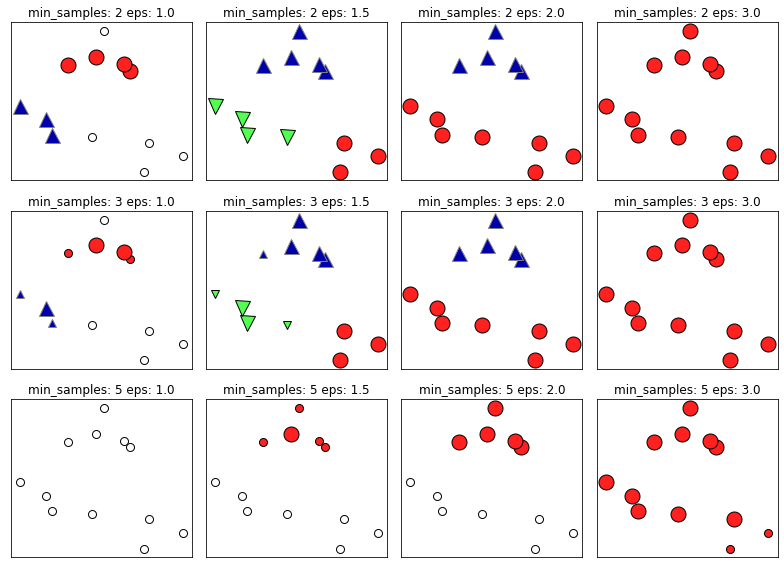

In [91]:
import mglearn # pip install mglearn

mglearn.plots.plot_dbscan()

### DBSCAN은 아주 유용한 군집 알고리즘이다.
### 주요 장점은 클러스터의 개수를 미리 지정할 필요가 없다.
### 복잡한 형상도 찾을 수 있으며, 어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.
### 병합군집이나 k-평균보다는 다소 느리지만 비교적 큰 데이터셋에도 적용할 수 있다.

---

# <span style="color:red">데이터 전처리</span>

- 어떤 입력을 가지냐에 따라 결과도 달라질 수 있어 전처리는 중요한 단계

- 결손값이 있으면 대체값으로 치환

1) 평균값 

2) null 값이 대부분이라면 drop

- 문자열로 된 필드는 사이킷 런에서 입력값으로 허용하지 않으므로 숫자로 변경이 필요. (데이터 인코딩)

1) 식별자 필드는 숫자로 변경하는 것 보다 제거하는게 낫다 (식별의 용도로 사용하고 분석에는 의미 없는값으로 예측 성능을 떨어트린다.)

- 전처리 종류


## [ 전처리 종류 ]

### <span style="color:blue">데이터 인코딩</span>
### 레이블 인코딩 
##### 예) TV: 1 , 냉장고 : 2 , 전자레인지 : 3
##### * 주의점 : 01, 02 는 문자열이지 숫자가 아님.

- 숫자는 클수록 영향도가 크므로 인코딩된 값에 따라 성능이 바뀌어 선형회귀에서는 사용하면 안됨. 해당 

- 트리 계열 ML 알고리즘은 숫자의 이런 특성을 반영하지 않아 가능함

### 원-핫 인코딩
#### 예) tv, 냉장고, 전자레인지

- 해당 하는 값에만 1을 주고 나머지는 0으로 표기하는 기법 (숫자의 값이 클수록 가중치가 부여되는 이슈 보안)

- sklearn or pandas 이용


### <span style="color:blue">스케일링</span>
### StandardScaler 
#### StandardScaler는 평균은 0에 가까운값, 분산은 1에 가까운 가우시안 정규 분포를 가진 값으로 변경

### MinMaxScaler 
#### MinMaxScaler는 데이터를 0과 1사이 값으로 변환 (음수가 있다면 -1 ~ 1값으로 변경)

##### 스케일링 유의 사항 - fit : 스케일링을 위한 기준 설정

- transform : 변환

- 잘못된 예) train data를 fit, transform  진행 후,
test data fit, transform 진행 하면 각각 스케일링 기준이 달라져서 정확한 예측이 불가능함.

-  올바른 예) **train data 를 fit, transform 진행 후, test data transform 진행**

In [ ]:
from sklearn.preprocessing import LabelEncoder 
items = ['TV', '냉장고', '전자레인지']
encoder = LabelEncoder() 
#encoder.fit(items) 
#labels = encoder.transform(items) 
encoder = LabelEncoder() 
encoder.fit(items) 
labels = encoder.transform(items) 
print('인코딩 값 : {}'.format(labels)) 
print('인코딩 클래스 : {}'.format(encoder.classes_)) 
print('인코딩 값을 거꾸로 뒤집어서 디코드 : {}'.format(encoder.inverse_transform(list(reversed(labels))))) # 인코딩 값 : [0 1 2] # 인코딩 클래스 : ['TV' '냉장고' '전자레인지'] # 인코딩 값을 거꾸로 뒤집어서 디코드 : ['전자레인지' '냉장고' 'TV']


In [ ]:
from sklearn.preprocessing import OneHotEncoder 
items = ['TV', '냉장고', '전자레인지','TV'] # 라벨 인코딩으로 숫자로 변환 후 1차원 > 2차원 변경 
encoder = LabelEncoder() 
encoder.fit(items) 
labels = encoder.transform(items) 
print('데이터 차원\n{0} \n라벨 인코딩 데이터\n{1}'.format(labels.shape,labels)) 
labels = labels.reshape(-1,1) 
print('------------') 
print('데이터 차원\n{0} \n2차원으로 변형된 데이터\n{1}'.format(labels.shape,labels))
oh_encoder = OneHotEncoder() 
oh_encoder.fit(labels) 
oh_labels = oh_encoder.transform(labels) 
print('원-핫 인코딩 데이터\n{0}'.format(oh_labels.toarray())) 
print('원-핫 인코딩 데이터 차원\n{0}'.format(oh_labels.shape))


In [ ]:
import pandas as pd 
df = pd.DataFrame({'item':items}) 
print(df)
pd.get_dummies(df)

* StandardScaler

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

* MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())


* Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [ ]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()
# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)
# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)
 
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

In [ ]:
# 앞에서 생성한 MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최소값이 0, 최대값이 5으로 설정됨 
scaler.fit(test_array)
# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)
# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))
